In [12]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist


In [13]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

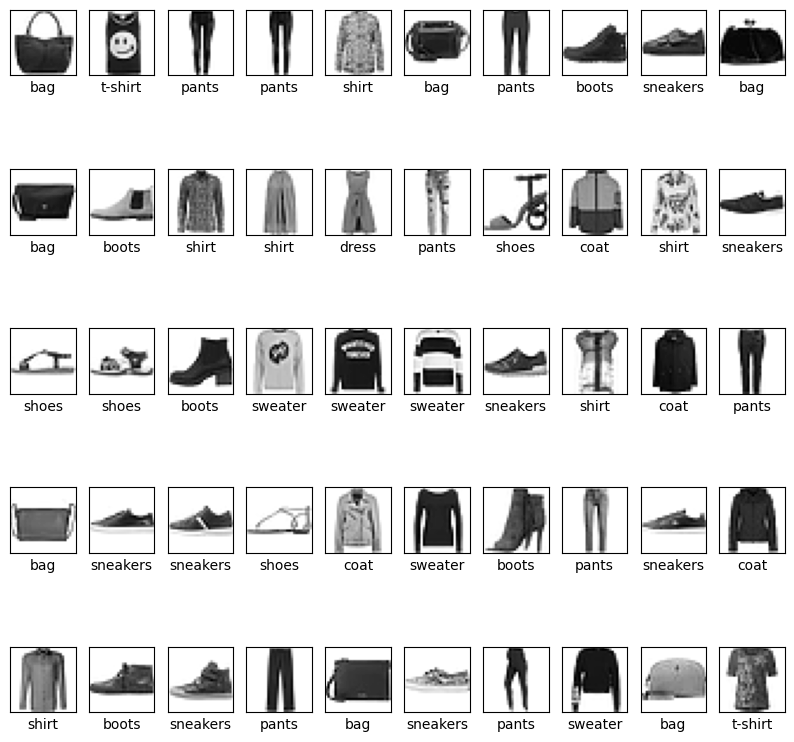

In [14]:
classes = ['t-shirt', 'pants', 'sweater', 'dress', 'coat', 'shoes', 'shirt', 'sneakers', 'bag', 'boots']
plt.figure(figsize=(10, 10))

for i in range(100, 150):
    plt.subplot(5, 10, i - 100 + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(classes[train_labels[i]])

plt.show()

In [15]:
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))
train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 flatten_4 (Flatten)         (None, 576)              

In [16]:
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10


1875/1875 [==============================] - 11s 5ms/step - loss: 0.4856 - accuracy: 0.8237 - val_loss: 0.3784 - val_accuracy: 0.8614
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3184 - accuracy: 0.8835 - val_loss: 0.3141 - val_accuracy: 0.8831
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2703 - accuracy: 0.9008 - val_loss: 0.2930 - val_accuracy: 0.8940
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2399 - accuracy: 0.9121 - val_loss: 0.2633 - val_accuracy: 0.9025
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2164 - accuracy: 0.9210 - val_loss: 0.2731 - val_accuracy: 0.8990
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1970 - accuracy: 0.9274 - val_loss: 0.2647 - val_accuracy: 0.9079
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1792 - accuracy: 0.9323 - val_loss: 0.2645 - val_accu

In [17]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

313/313 [==============================] - 1s 2ms/step - loss: 0.2711 - accuracy: 0.9116
Test accuracy: 0.9115999937057495


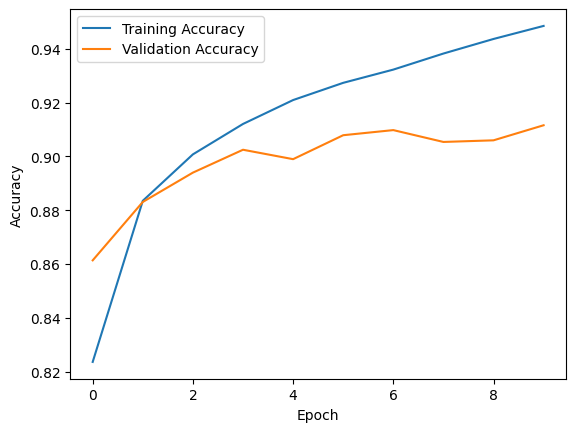

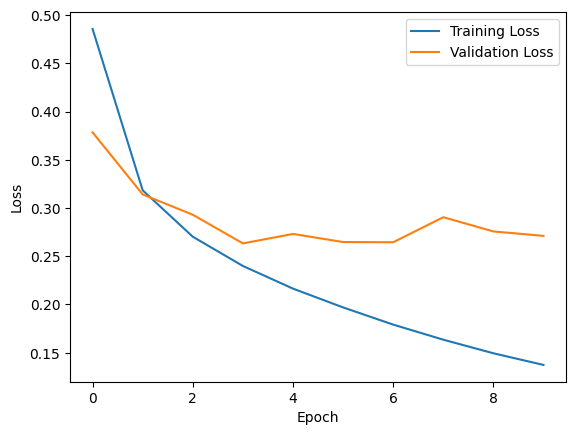

In [18]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()